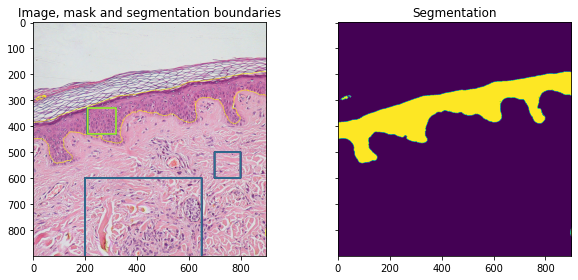

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, segmentation, feature, future
from sklearn.ensemble import RandomForestClassifier
from functools import partial

full_img = data.skin()

img = full_img[:900, :900]

# Build an array of labels for training the segmentation.
# Here we use rectangles but visualization libraries such as plotly
# (and napari?) can be used to draw a mask on the image.
training_labels = np.zeros(img.shape[:2], dtype=np.uint8)
#training_labels[:130] = 1
#training_labels[:170, :400] = 1
training_labels[600:900, 200:650] = 1
training_labels[330:430, 210:320] = 2
#training_labels[260:340, 60:170] = 4
training_labels[500:600, 700:800] = 1
#training_labels[150:200, 720:860] = 4

sigma_min = 1
sigma_max = 16
features_func = partial(feature.multiscale_basic_features,
                        intensity=True, edges=False, texture=True,
                        sigma_min=sigma_min, sigma_max=sigma_max,
                        channel_axis=-1)
features = features_func(img)
clf = RandomForestClassifier(n_estimators=50, n_jobs=-1,
                             max_depth=10, max_samples=0.05)
clf = future.fit_segmenter(training_labels, features, clf)
result = future.predict_segmenter(features, clf)

fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(9, 4))
ax[0].imshow(segmentation.mark_boundaries(img, result, mode='thick'))
ax[0].contour(training_labels)
ax[0].set_title('Image, mask and segmentation boundaries')
ax[1].imshow(result)
ax[1].set_title('Segmentation')
fig.tight_layout()

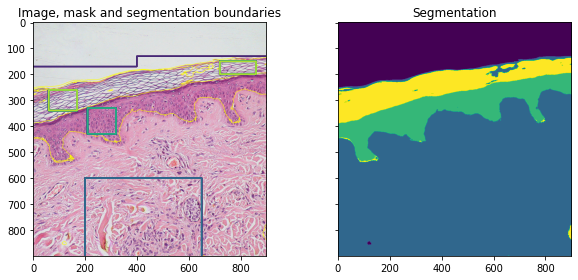

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, segmentation, feature, future
from sklearn.ensemble import RandomForestClassifier
from functools import partial

full_img = data.skin()

img = full_img[:900, :900]

# Build an array of labels for training the segmentation.
# Here we use rectangles but visualization libraries such as plotly
# (and napari?) can be used to draw a mask on the image.
training_labels = np.zeros(img.shape[:2], dtype=np.uint8)
training_labels[:130] = 1
training_labels[:170, :400] = 1
training_labels[600:900, 200:650] = 2
training_labels[330:430, 210:320] = 3
training_labels[260:340, 60:170] = 4
training_labels[150:200, 720:860] = 4

sigma_min = 1
sigma_max = 16
features_func = partial(feature.multiscale_basic_features,
                        intensity=True, edges=False, texture=True,
                        sigma_min=sigma_min, sigma_max=sigma_max,
                        channel_axis=-1)
features = features_func(img)
clf = RandomForestClassifier(n_estimators=50, n_jobs=-1,
                             max_depth=10, max_samples=0.05)
clf = future.fit_segmenter(training_labels, features, clf)
result = future.predict_segmenter(features, clf)

fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(9, 4))
ax[0].imshow(segmentation.mark_boundaries(img, result, mode='thick'))
ax[0].contour(training_labels)
ax[0].set_title('Image, mask and segmentation boundaries')
ax[1].imshow(result)
ax[1].set_title('Segmentation')
fig.tight_layout()

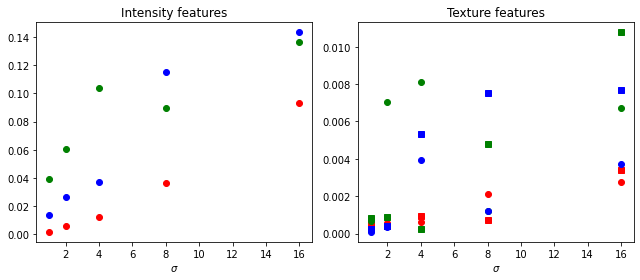

In [2]:
fig, ax = plt.subplots(1, 2, figsize=(9, 4))
l = len(clf.feature_importances_)
feature_importance = (
        clf.feature_importances_[:l//3],
        clf.feature_importances_[l//3:2*l//3],
        clf.feature_importances_[2*l//3:])
sigmas = np.logspace(
        np.log2(sigma_min), np.log2(sigma_max),
        num=int(np.log2(sigma_max) - np.log2(sigma_min) + 1),
        base=2, endpoint=True)
for ch, color in zip(range(3), ['r', 'g', 'b']):
    ax[0].plot(sigmas, feature_importance[ch][::3], 'o', color=color)
    ax[0].set_title("Intensity features")
    ax[0].set_xlabel("$\\sigma$")
for ch, color in zip(range(3), ['r', 'g', 'b']):
    ax[1].plot(sigmas, feature_importance[ch][1::3], 'o', color=color)
    ax[1].plot(sigmas, feature_importance[ch][2::3], 's', color=color)
    ax[1].set_title("Texture features")
    ax[1].set_xlabel("$\\sigma$")

fig.tight_layout()

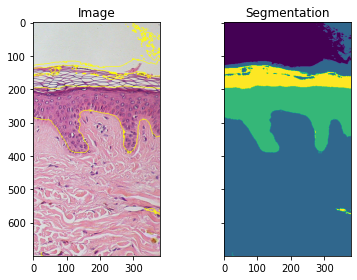

In [3]:
img_new = full_img[:700, 900:]

features_new = features_func(img_new)
result_new = future.predict_segmenter(features_new, clf)
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(6, 4))
ax[0].imshow(segmentation.mark_boundaries(img_new, result_new, mode='thick'))
ax[0].set_title('Image')
ax[1].imshow(result_new)
ax[1].set_title('Segmentation')
fig.tight_layout()

plt.show()